# Here you run your code to model the data
Evaluation
Evaluate how well your work solves the stated business problem.

Questions to consider:

How do you interpret the results?
How well does your model fit your data? How much better is this than your baseline model?
How confident are you that your results would generalize beyond the data you have?
How confident are you that this model would benefit the business if put into use?
Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

What would you recommend the business do as a result of this work?
What are some reasons why your analysis might not fully solve the business problem?
What else could you do in the future to improve this project?




<img src="Images/logo.png">

# <center>Microsoft Movie Studio</center>

# Overview
***

This projects goal is to explore movie analytics to provide actionable insights for Microsoft's new Movie Studio. My goal for this project was to help aide Microsoft in creating a baseline structure to assist them in deciding what factors are important to take into consideration when chosing what types of films to produce! 

I carried out exploritory analyses on datasets containing information about movie titles, ratings, genres, gross income, and directors to create a selection of business models for Microsoft's consideration.

My analyses show that movies under the genres Action, Sci-Fi, and Mystery, on average, have a higher gross box-offince income. But, as far as movie ratings go, Drama and Non-Fiction movies tend to get higher ratings. This tells us that while Action/Sci-Fi/Mystery movies generally make more money in the box-office, they are not percieved as well by critics.

My analyses also explore movie ratings (G, PG, PG-13, R, NR) and the distribution of total movies made through each category, as well as how well, on average, they are percieved by critics. This data shows that R rated movies are made at a much higher rate and on average are rated 'Fresh' on Rotton Tomatoes more often than any other movie rating

As a bonus, I have explored the Top 10 Movie Directors by the number of films they have directed and analysed their average movie rating. This has shown that Stephen Spielberg has both made the highest number of movies, as well as has the highest average ratings. This tells us that he would be a excellent director to partner with. 

# Business Problem

***

#Business Problem Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

**hello**

***
Questions to Consider:
* What ...
***

[link] ()

1. hello
2. hello


``` code block```

In [1]:
# Questions to consider:

# What are the business's pain points related to this project? How did you pick the data analysis question(s) that you did? Why are these questions important from a business perspective? Data Understanding Describe the data being used for this project.

# Questions to consider:

# Where did the data come from, and how do they relate to the data analysis questions? What do the data represent? Who is in the sample and what variables are included? What is the target variable? What are the properties of the variables you intend to use?

# Data Understanding
---

The data used in this project is gathered from IMDB, Rotton Tomatoes, Box Office Mojo, The Movie Database, and The Numbers.


***
### Questions I Will Be Analysing

1. What is the distribution of movie ratings and genres?
2. What are the top 5 actors and directors?
3. 

# Import Packages
***

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data
***

## Data Exploration

In [3]:
# picture of the different tables and how they connect (sql style with primary keys, foreign keys, and how they relate, etc?)

In [4]:
#explaination of data being read in

## Data Preparation

```read_csv``` for all necessary data files

In [20]:
#CSV files needed for visualization of genre and ratings
imdb_title = pd.read_csv("Data/imdb.title.basics.csv.gz")
imdb_ratings = pd.read_csv("Data/imdb.title.ratings.csv.gz")

In [6]:
#CSV files needed for analyzing most popular people (directors and actors)
#imdb_names = pd.read_csv("Data/imdb.name.basics.csv.gz")

In [21]:
#CSV files for finding top directors and their average movie ratings
rt_movies = pd.read_csv("Data/rt.movie_info.tsv.gz", sep='\t')
rt_reviews = pd.read_csv("Data/rt.reviews.tsv.gz", sep='\t', encoding = "ISO-8859-1")

In [22]:
#CSV files for finding budgets
bom_gross = pd.read_csv('Data/bom.movie_gross.csv.gz')
tn_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')

In [9]:
#merge title with BOM gorss or tn budgets and see which one has more info

### Data Merging

In [23]:
#merge movie titles and ratings based on their common column 'tconst'
imdb_title_ratings = pd.merge(imdb_title, imdb_ratings, left_on='tconst', right_on='tconst')
imdb_title_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [24]:
#merge title_ratings dataframe with bom_gross to get the gross per movie title. Clean so there's no duplicates
movie_gross = pd.merge(imdb_title_ratings, bom_gross, left_on=['primary_title','start_year'], right_on=['title', 'year'])
movie_gross = movie_gross.sort_values(by='numvotes', ascending=False)
movie_gross_unique = movie_gross.drop_duplicates(subset='primary_title', keep='first')
movie_gross_unique.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
346,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Inception,WB,292600000.0,535700000,2010
330,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,The Dark Knight Rises,WB,448100000.0,636800000,2012
72,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Interstellar,Par.,188000000.0,489400000,2014
755,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,Django Unchained,Wein.,162800000.0,262600000,2012
121,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,275100000,2013


### Data Cleaning

##### 1. Clean up IMDB Title and Ratings Dataframes

In [25]:
# remove any rows with NULL values in the Genre column for the IMDB titles/ratings dataframe
imdb_title_ratings_drop = imdb_title_ratings.dropna(subset=['genres'])

In [26]:
#Create a generalized list of popular genres to group movies into based on their 'genre' column
genres = ['Action', 'Comedy', 'Horror', 'Western', 'Documentary', 'Mystery', 'Family', 'Fantasy', 'Drama', 'Thriller', 'Romance', 'Sci-Fi', 'Biography']

##### 2. Clean up Rotton Tomatoes Dataframe: drop any NULL values in ratings as well as any ratings consisting of unintelligable characters

In [27]:
#Drop rows with NULL values in the rating column as well as any rows with Ratings that are unintelligable
rt_reviews_dropna = rt_reviews.dropna(subset=['rating'])
rt_reviews_drops = rt_reviews_dropna[(rt_reviews_dropna['rating'] != 'T') & \
                                  (rt_reviews_dropna['rating'] != 'N') & \
                                  (rt_reviews_dropna['rating'] != 'R') & \
                                  (rt_reviews_dropna['rating'] != '1-5') &\
                                  (rt_reviews_dropna['rating'] != '3 1/2') ]

In [28]:
#dictionary to map for converting ratings
grades = {'A+':9.9, 'A':9.5, 'A-':9.0, 'B+':8.9, 'B':8.5, 'B-':8.0, 'C+':7.9, 'C':7.5, 'C-':7.0, 'D+':6.9, 'D':6.5,'D-':6.0, 'F+':5.9, 'F':5.5, 'F-':5.0}

##### 3. Clean up rotton tomatoes dataframe to drop all rows without a value for 'fresh'

In [29]:
#Drop rows with NULL values in the fresh column
rt_reviews_fresh = rt_reviews.dropna(subset=['fresh'])

### Data Engineering

##### 1. Convert Rotton Tomatoes critics ratings (fresh or rotten) into 0 or 1 and aggregate totals by movie rating (G, PG, PG-13, R, NR)

In [30]:
#map into integers 0 and 1 whether fresh or rotton and drop any NULL values
rt_reviews_fresh['fresh_numeric'] = rt_reviews_fresh['fresh'].map(lambda x: 1 if x == 'fresh' else 0)
rt_reviews_fresh['rotten_numeric'] = rt_reviews_fresh['fresh'].map(lambda x: 1 if x == 'rotten' else 0)

In [31]:
#group by number of fresh and rotton
rt_reviews_fresh_grouped = rt_reviews_fresh.groupby(['id', 'fresh']).agg('sum')

In [32]:
#merge rt_reviews_fresh with rt_movies to get movie ratings
rt_reviews_fresh_merged = pd.merge(rt_movies, rt_reviews_fresh_grouped, left_on='id', right_on='id')

In [33]:
#split fresh and rotton up into different dataframes so we compare counts
rt_fresh = rt_reviews_fresh_merged[rt_reviews_fresh_merged['fresh_numeric'] >= rt_reviews_fresh_merged['rotten_numeric']]
rt_rotton = rt_reviews_fresh_merged[rt_reviews_fresh_merged['rotten_numeric'] > rt_reviews_fresh_merged['fresh_numeric']]

In [34]:
#combine them back into one dataframe to determine whether overall fresh or overall rotten
rt_fresh_comb = pd.merge(rt_fresh, rt_rotton, how='outer', left_on='id', right_on='id')
rt_fresh_comb['fresh_rotten'] = np.where((rt_fresh_comb['fresh_numeric_x'] >= rt_fresh_comb['rotten_numeric_y']), 1, 0)

In [35]:
#determine which movies are overall fresh
rt_fresh_split = rt_fresh_comb[rt_fresh_comb['fresh_rotten'] == 1]

In [36]:
#determine the number of movies per rating which are determined fresh
rt_fresh_grouped_rating = rt_fresh_split.groupby(['rating_x'])['fresh_rotten'].sum().reset_index()

```ratings```: movie ratings

```rt_ratings_totals```: number of total movies for each rating

```rt_fresh_totals```: number of total fresh movies for each rating

In [37]:
#Create a list of movie ratings for visualization
ratings = rt_fresh_grouped_rating['rating_x'].value_counts().sort_index().index

In [38]:
#Number of total movies for each ratings (not split by fresh or rotten)
rt_ratings_totals = rt_fresh_comb['rating_x'].value_counts().sort_index().values

In [39]:
#Create a list of number of movies rated fresh per movie rating
rt_fresh_totals = rt_fresh_grouped_rating['fresh_rotten'].values

##### 2. Convert rotton tomato ratings into comparable values to use for analysis for critic ratings for top directors

In [40]:
#converts ratings to percents if rating contains '/'
def conv_rating(rating):
    if '/' in rating:
        r = rating.split('/')
        return float(r[0])/float(r[1])*10
    elif rating in grades:
        return grades[rating]
    else:
        return float(rating)

In [41]:
#pass each rating into conv_rating method
rt_reviews_conv = rt_reviews_drops.copy()
rt_reviews_conv['conv_ratings'] = rt_reviews_conv['rating'].map(lambda x: conv_rating(x))

In [42]:
#Combine rows with matching ID column and take average of the ratings
rt_reviews_comb = rt_reviews_conv.groupby(['id'])['conv_ratings'].apply(lambda x: x.mean()).reset_index()

In [43]:
#merge Rotton Tomato movie Dataframe with the Ratings Dataframe
rt_movie_rev = pd.merge(rt_movies, rt_reviews_comb, left_on='id', right_on='id')

```top_directors```: Top 10 directors by number of movies

```final_direct_ratings```: Average rating for each top directors movies

In [44]:
#Create a list of the top 10 directors for visualization
top_directors = rt_movie_rev['director'].value_counts().index[:10].values

In [45]:
#Take only the ratings with indexes that have a director in the top 10
top_direct_ratings = rt_movie_rev.loc[rt_movie_rev['director'].isin(top_directors)]

In [46]:
#Group by again so we can take the average rating of all the directors movies
final_direct_ratings = top_direct_ratings.groupby(['director'])['conv_ratings'].apply(lambda x: x.mean()).reset_index()


##### 3. Find the average rating for movies in IMDB Dataframe. Combine Genre data to make comparable and easy to visualize

In [47]:
#iterate through each title in title list to find average rating. add avg rating to list on actor/director name
def find_rating(title_list):
    avg_rating = 0
    len_list = len(title_list)
    for title in title_list:
        row = imdb_ratings.loc[imdb_ratings['tconst'] == title]
        if len(row['averagerating'].values) > 0:
            avg_rating += row['averagerating'].values[0]
        else:
            len_list -= 1
    return avg_rating

In [48]:
#helper method to generalize genre
def find_genre(genre_list):
    for gen in genre_list:
        if gen in genres:
            return gen

In [49]:
#assigns one genre to movie to make easier to group and organize. Make copy beforehad to avoid warnings
imdb_title_ratings_map = imdb_title_ratings_drop.copy()
imdb_title_ratings_map['overall_genre'] = imdb_title_ratings_map['genres'].map(lambda x: find_genre(x.split(',')))

the following dataframes are used for visualizing the distribution of each genre

In [50]:
#groups genres into similar categories to make easier to visualize 
ratings_action_scifi = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Action') |(imdb_title_ratings_map['overall_genre'] == 'Sci_Fi') | (imdb_title_ratings_map['overall_genre'] == 'Fantasy')]
ratings_comedy = imdb_title_ratings_map[imdb_title_ratings_map['overall_genre'] == 'Comedy']
ratings_horror = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Thriller') | (imdb_title_ratings_map['overall_genre'] == 'Horror')]
ratings_drama = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Drama') | (imdb_title_ratings_map['overall_genre'] == 'Romance')]
ratings_nonfiction = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Biography') | (imdb_title_ratings_map['overall_genre'] == 'Documentary')]
ratings_other = imdb_title_ratings_map[(imdb_title_ratings_map['overall_genre'] == 'Family') | (imdb_title_ratings_map['overall_genre'] == 'Mystery') | \
                                          (imdb_title_ratings_map['overall_genre'] == 'Western') | (imdb_title_ratings_map['overall_genre'] == 'Other')]


In [ ]:
#How did you analyze or model the data? How did you iterate on your initial approach to make it better? Why are these choices appropriate given the data and the business problem?

##### 5. Find the average domestic_gross for each generalized genre

In [51]:
#Use the find_genre method to generalize genre for visualization correlating domestic_gross and genre
movie_gross_map = movie_gross_unique.copy()
movie_gross_map['overall_genre'] = movie_gross_map['genres'].map(lambda x: find_genre(x.split(',')))

In [52]:
#Create a list of genres and corresponding average domestic_gross
avg_gross_by_genre = movie_gross_map.groupby(['overall_genre'])['domestic_gross'].apply(lambda x: x.mean()).reset_index()
avg_genre = avg_gross_by_genre['overall_genre'].value_counts().index
avg_gross = avg_gross_by_genre['domestic_gross'].values

# Visualizations
***

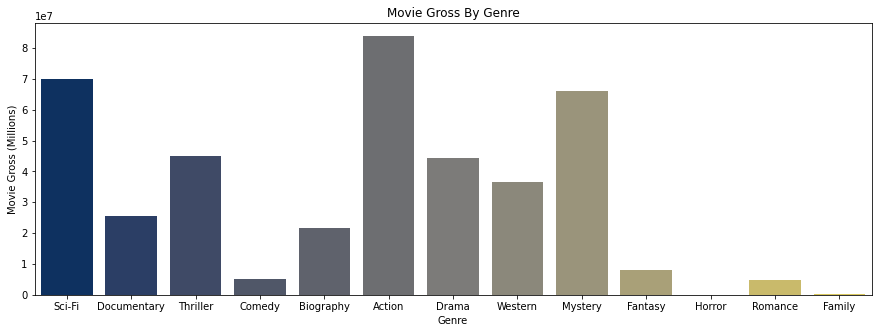

In [53]:
fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(x=avg_genre, y=avg_gross, palette='cividis')


ax.set_title("Movie Gross By Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Movie Gross (Millions)");


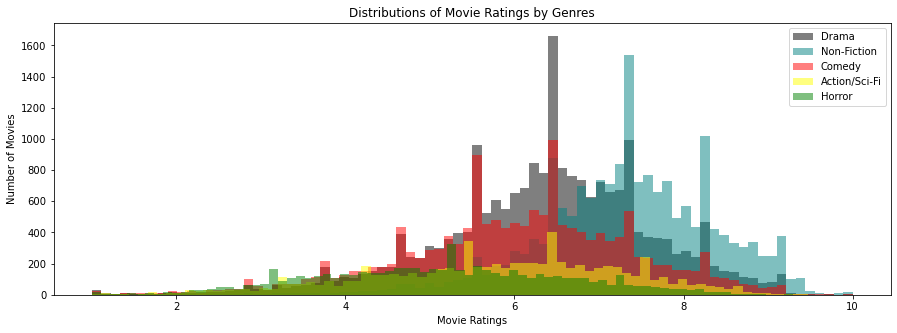

In [54]:
# Visualization for mapping a distribution of movie ratings by genre
fig, ax = plt.subplots(figsize=(15,5))
bins = 80

ax.hist(x=ratings_drama['averagerating'], label="Drama",
    bins=bins,
    color="black",
    alpha=0.5)
ax.hist(x=ratings_nonfiction['averagerating'], label="Non-Fiction",
    bins=bins,
    color="teal",
    alpha=0.5)
ax.hist(x=ratings_comedy['averagerating'], label="Comedy",
    bins=bins,
    color="red",
    alpha=0.5)
ax.hist(x=ratings_action_scifi['averagerating'], label="Action/Sci-Fi",
    bins=bins,
    color="yellow",
    alpha=0.5)
ax.hist(x=ratings_horror['averagerating'], label="Horror",
    bins=bins,
    color="green",
    alpha=0.5)


# Customize labels
ax.set_title("Distributions of Movie Ratings by Genres")
ax.set_xlabel("Movie Ratings")
ax.set_ylabel("Number of Movies")
ax.legend();

```Average rating for Drama: 6.3470974044097135
Average rating for Non-Fiction: 7.292722416048845
Average rating for Comedy: 6.005628121398386
Average rating for Action/Sci-FI: 5.806539581678581
Average rating for Horror: 5.108700999231361```

In [59]:
ratings_drama['averagerating'].describe()

count    21498.000000
mean         6.347097
std          1.273435
min          1.000000
25%          5.600000
50%          6.400000
75%          7.200000
max         10.000000
Name: averagerating, dtype: float64

In [55]:
print('Average rating for Drama: {}'.format(ratings_drama['averagerating'].mean()))
print('Average rating for Non-Fiction: {}'.format(ratings_nonfiction['averagerating'].mean()))
print('Average rating for Comedy: {}'.format(ratings_comedy['averagerating'].mean()))
print('Average rating for Action/Sci-FI: {}'.format(ratings_action_scifi['averagerating'].mean()))
print('Average rating for Horror: {}'.format(ratings_horror['averagerating'].mean()))

Average rating for Drama: 6.3470974044097135
Average rating for Non-Fiction: 7.292722416048845
Average rating for Comedy: 6.005628121398386
Average rating for Action/Sci-FI: 5.806539581678581
Average rating for Horror: 5.108700999231361


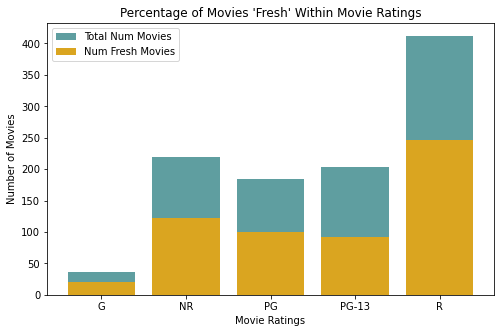

In [64]:
fig, ax = plt.subplots(figsize=(8,5))

#ax.bar(rated_list, avg_ratings, color='goldenrod')

ax.bar(ratings, rt_ratings_totals, color='cadetblue', label='Total Num Movies')
ax.bar(ratings, rt_fresh_totals, color='goldenrod', label='Num Fresh Movies') # percent that are fresh vs rotton


# Customize labels
ax.set_title("Percentage of Movies 'Fresh' Within Movie Ratings")
ax.set_xlabel("Movie Ratings")
ax.set_ylabel("Number of Movies")
ax.legend();


#Can do one graph # movies and then have the percent of that be high ratings


In [68]:
perc = (rt_fresh_totals/rt_ratings_totals)*100
perc

array([56.75675676, 55.90909091, 54.34782609, 45.32019704, 59.95145631])

``` G: 57% Fresh
NR: 56% Fresh
PG: 54% Fresh
PG-13: 45% Fresh
R: 60% Fresh```

''

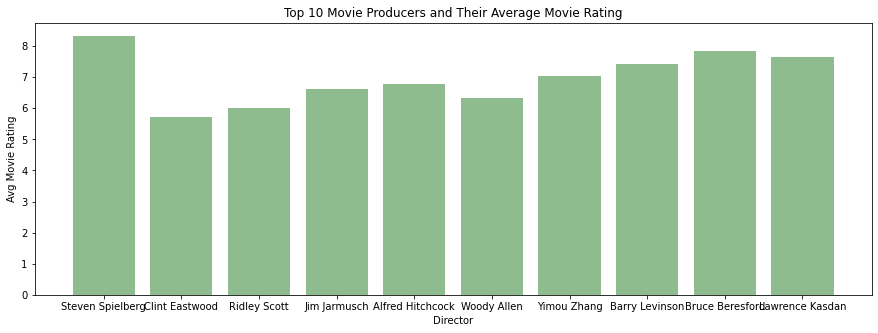

In [57]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(top_directors, final_direct_ratings['conv_ratings'], color='darkseagreen')

ax.set_title("Top 10 Movie Producers and Their Average Movie Rating")
ax.set_xlabel('Director')
ax.set_ylabel('Avg Movie Rating')
;

# Conclusion
***

# Next Steps
***

In [ ]:
# Your code here - remember to use markdown cells for comments as well!